# Importing Libraries

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

# Reading the Data

Dataset downloaded from https://www.kaggle.com/datasets/reyadgh/my-anime-list-scraped-dataset

In [2]:
pwd = os.getcwd()

df = pd.read_csv(pwd + '\\top_animes_after_cleaning.csv')

df.head()

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,...,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Themes,Demographics,Seasonal
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,...,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493,67,42,['Unknown-Themes'],['Shounen'],False
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,...,226182,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912,59,39,['Military'],['Shounen'],False
2,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Kad...",Funimation,White Fox,Visual novel,...,189734,Eccentric scientist Rintarou Okabe has a never...,Steins;Gate,NaN,1006,73,73,"['Psychological', 'TimeTravel']",['Unknown-Demographic'],True
3,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,...,16680,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama°,Gintama Season 4,79,3,1,"['GagHumor', 'Historical', 'Parody', 'Samurai']",['Shounen'],False
4,進撃の巨人 Season3 Part.2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi B...",Funimation,Wit Studio,Manga,...,58793,Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,198,9,11,"['Gore', 'Military', 'Survival']",['Shounen'],True


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,15262.0,5.683993,2.334854,0.0,5.541,6.351,7.081,9.361
Ranked,15262.0,7631.493448,4405.906909,1.0,3816.250,7631.500,11446.750,15262.000
Popularity,15262.0,9708.122527,6779.327272,1.0,3944.250,8933.000,14165.000,26654.000
Members,15262.0,64416.427991,209612.115631,21.0,850.000,4408.500,32442.500,3959246.000
Favorites,15262.0,751.310117,5852.707458,0.0,0.000,6.000,68.000,226182.000
Recommended,15262.0,10.794784,42.608240,0.0,0.000,1.000,4.000,1142.000
Mixed Feelings,15262.0,2.877342,9.178548,0.0,0.000,0.000,2.000,349.000
Not Recommended,15262.0,2.418294,9.603337,0.0,0.000,0.000,1.000,419.000


In [4]:
df.shape

(15262, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15262 entries, 0 to 15261
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Japanese         15047 non-null  object 
 1   Type             15262 non-null  object 
 2   Episodes         15262 non-null  object 
 3   Status           15262 non-null  object 
 4   Aired            15262 non-null  object 
 5   Premiered        5527 non-null   object 
 6   Producers        15262 non-null  object 
 7   Licensors        15262 non-null  object 
 8   Studios          15253 non-null  object 
 9   Source           15262 non-null  object 
 10  Genres           15262 non-null  object 
 11  Duration         15262 non-null  object 
 12  Rating           15262 non-null  object 
 13  Score            15262 non-null  float64
 14  Ranked           15262 non-null  int64  
 15  Popularity       15262 non-null  int64  
 16  Members          15262 non-null  int64  
 17  Favorites   

In [6]:
df.isna().sum()

Japanese            215
Type                  0
Episodes              0
Status                0
Aired                 0
Premiered          9735
Producers             0
Licensors             0
Studios               9
Source                0
Genres                0
Duration              0
Rating                0
Score                 0
Ranked                0
Popularity            0
Members               0
Favorites             0
description           0
Name                  0
English Name       8422
Recommended           0
Mixed Feelings        0
Not Recommended       0
Themes                0
Demographics          0
Seasonal              0
dtype: int64

# Cleaning


In [7]:
# Cleaning symbols
symbols_to_remove = ['Themes', 'Demographics', 'Genres']
for columns in df[symbols_to_remove]:
    df[columns] = df[columns].str.strip('[]').str.replace(r"\'", '', regex=True).astype(str)

In [8]:
# Filling null values
df[['English Name', 'Japanese']] = df[['English Name', 'Japanese']].fillna(value='None')

**We're going to use values from the 'Aired' column to fill null and '?' values in the 'Premiered' column.**

In [9]:
print("There are", len(df.loc[
    (df['Premiered'].isna()) |
    (df['Premiered'].str.contains('\?'))
]), "values in the 'Premiered' column that need to be filled and / or replaced.")

There are 10323 values in the 'Premiered' column that need to be filled and / or replaced.


In [10]:
# Checking for values that don't have numbers in the 'Aired' column
df.loc[df['Aired'].str.contains(r'[0-9]+', regex=True) == False]['Aired'].value_counts()

Aired
Not available    182
Name: count, dtype: int64

In [11]:
# Dropping 'not available' values in the 'Aired' column
df.drop(df.loc[df['Aired'].str.contains('not available', case=False)].index, inplace=True)

In [12]:
# Preparing the substitute data from the 'Aired' column
aired_to_premiered = df.loc[
    (df['Premiered'].isna()) |
    (df['Premiered'].str.contains("\?")),
    'Aired']
aired_to_premiered

5                        Jan 8, 2021
8        Jan 8, 1988 to Mar 17, 1997
16                      Sep 17, 2016
20                       Jul 6, 2013
21        Mar 4, 2023 to Nov 5, 2023
                    ...             
15257                           1958
15258                           1980
15259                           2018
15260     Jan 5, 2023 to Mar 2, 2023
15261                      2015 to ?
Name: Aired, Length: 10141, dtype: object

In [13]:
# Grabbing the first instance of the date
aired_clean = aired_to_premiered.str.split(' to ').str[0]
aired_clean

5         Jan 8, 2021
8         Jan 8, 1988
16       Sep 17, 2016
20        Jul 6, 2013
21        Mar 4, 2023
             ...     
15257            1958
15258            1980
15259            2018
15260     Jan 5, 2023
15261            2015
Name: Aired, Length: 10141, dtype: object

In [14]:
# Extracting the year
aired_year = aired_clean.str.replace(r'.* ', '', regex=True)
aired_year

5        2021
8        1988
16       2016
20       2013
21       2023
         ... 
15257    1958
15258    1980
15259    2018
15260    2023
15261    2015
Name: Aired, Length: 10141, dtype: object

In [15]:
# Extracting the months
aired_month = aired_clean.str.split(', ').str[0].str.split(' ').str[0]
aired_month

5         Jan
8         Jan
16        Sep
20        Jul
21        Mar
         ... 
15257    1958
15258    1980
15259    2018
15260     Jan
15261    2015
Name: Aired, Length: 10141, dtype: object

In [16]:
# Transforming the months into season and year into empty string
def month_to_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    elif month in ['Sep', 'Oct', 'Nov']:
        return 'Fall'
    else:
        return ''

aired_season = aired_month.apply(month_to_season)
aired_season

5        Winter
8        Winter
16         Fall
20       Summer
21       Spring
          ...  
15257          
15258          
15259          
15260    Winter
15261          
Name: Aired, Length: 10141, dtype: object

In [17]:
# Concatenating season and year
season_premiered = (aired_season + ' ' + aired_year)
season_premiered

5        Winter 2021
8        Winter 1988
16         Fall 2016
20       Summer 2013
21       Spring 2023
            ...     
15257           1958
15258           1980
15259           2018
15260    Winter 2023
15261           2015
Name: Aired, Length: 10141, dtype: object

In [18]:
# Applying new values
df.loc[(df['Premiered'].isna()) |
       (df['Premiered'].str.contains("\?")),
       'Premiered'] = season_premiered

df['Premiered'].isna().sum()

0

# Data Exploration

## Titles Released Over the Years

In [19]:
# Making new 'ReleaseYear' column
df['ReleaseYear'] = pd.to_numeric(df['Premiered'].str.split().str[1])

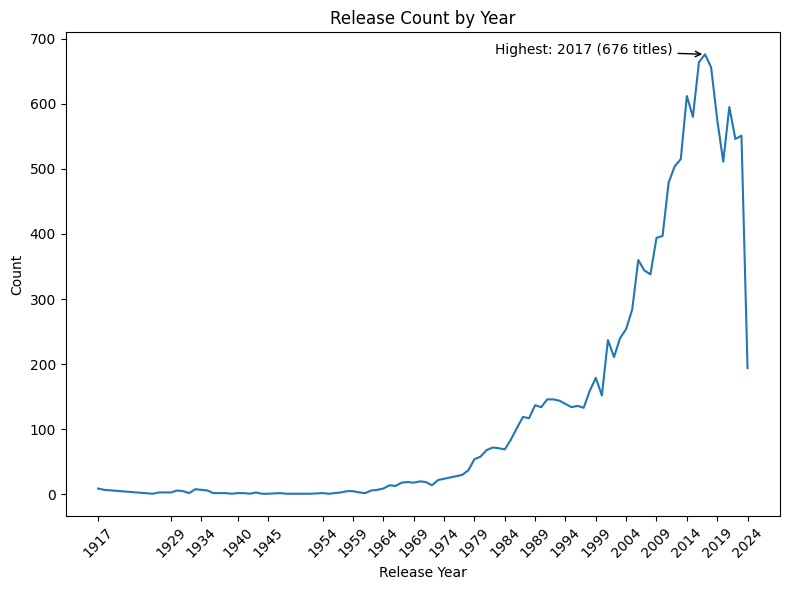

In [20]:
release_count = pd.DataFrame(df['ReleaseYear'].value_counts().sort_index())

plt.figure(figsize=(8, 6))
plt.plot(release_count.index, release_count.values)

max_count = release_count.max()[0]
max_year = release_count.idxmax()[0].astype(int)

plt.annotate(f'Highest: {max_year} ({max_count} titles)', 
             xy=(max_year, max_count), 
             xytext=(max_year - 20, max_count),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

plt.title('Release Count by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(release_count.index[::5], rotation=45)
plt.tight_layout()

## Most Recommended by Season

In [21]:
# Making new 'Season' column
df['Season'] = df['Premiered'].str.split().str[0]

In [22]:
df['Season'].unique()

array(['Fall', 'Spring', 'Winter', 'Summer', '2003', '2006', '2005',
       '2004', '2008', '1986', '2002', '2018', '1993', '1976', '2001',
       '2019', '2017', '1961', '2009', '1980', '2007', '2000', '2015',
       '1994', '2022', '1964', '2021', '1988', '2012', '1997', '2013',
       '1981', '2016', '1996', '1969', '1978', '1987', '2010', '1998',
       '1982', '1991', '1995', '1984', '1999', '1985', '1990', '2011',
       '1972', '2014', '1977', '1968', '1992', '1989', '1966', '1963',
       '1979', '1929', '1983', '1932', '1960', '1959', '1975', '1974',
       '1970', '1933', '1971', '1925', '1930', '1973', '1956', '1935',
       '2020', '1926', '1928', '1965', '1957', '1946', '1931', '1947',
       '1941', '1938', '1924', '1967', '1950', '1936', '1948', '1940',
       '1952', '1958', '1937', '1939', '1942', '1934', '1954', '1962',
       '1955', '1951', '1953', '2023'], dtype=object)

In [23]:
# Replacing numerical values with 'Unknown'
df['Season'] = df['Season'].str.replace(r'[0-9]+', 'Unknown', regex=True)

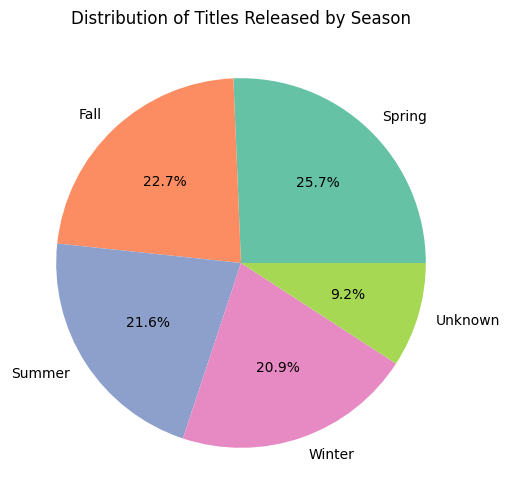

In [24]:
# Let's look at the distribution
seasons_perc = df['Season'].value_counts() / len(df) * 100
colors = sns.color_palette('Set2')

plt.figure(figsize=(8, 6))
plt.pie(data=seasons_perc, x=seasons_perc.values, labels=seasons_perc.index , autopct='%.1f%%', colors=colors)

plt.title('Distribution of Titles Released by Season')
plt.show()

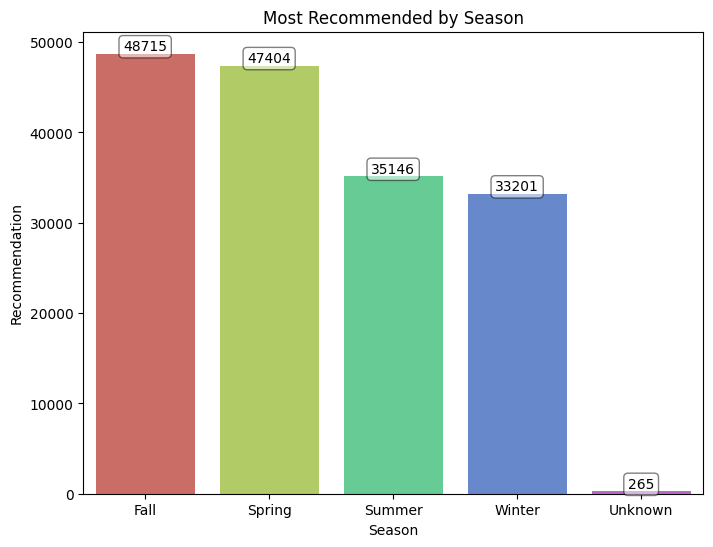

In [25]:
seasons_df = pd.DataFrame(df.groupby('Season')['Recommended'].sum().sort_values(ascending=False))

plt.figure(figsize=(8, 6))
ax=sns.barplot(data=seasons_df, x=seasons_df.index, y=seasons_df['Recommended'], palette='hls')
for item in ax.containers:
    ax.bar_label(item, label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.title('Most Recommended by Season')
plt.xlabel('Season')
plt.ylabel('Recommendation')
plt.show()

## Recommendation by Source Type

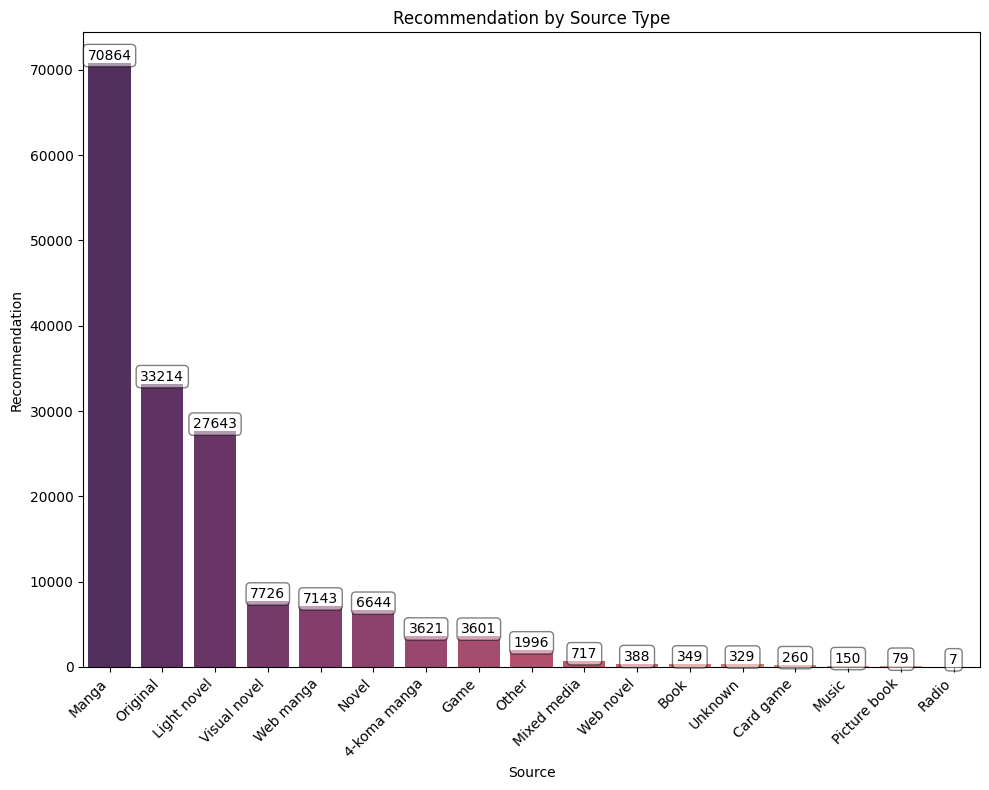

In [26]:
source_df = pd.DataFrame(df.groupby('Source')['Recommended'].sum().sort_values(ascending=False))

plt.figure(figsize=(10, 8))
ax=sns.barplot(data=source_df, x=source_df.index, y=source_df['Recommended'], palette='flare_r')
for item in ax.containers:
    ax.bar_label(item, label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.title('Recommendation by Source Type')
plt.xlabel('Source')
plt.ylabel('Recommendation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Recommendation by Broadcast Type

In [27]:
df['Type'].value_counts()

Type
TV            5418
Movie         3155
ONA           2339
OVA           2079
Special       1540
TV Special     548
Unknown          1
Name: count, dtype: int64

In [28]:
# Let's drop the single 'Unknown' value
df.drop(df.loc[df['Type'] == 'Unknown'].index, inplace=True)

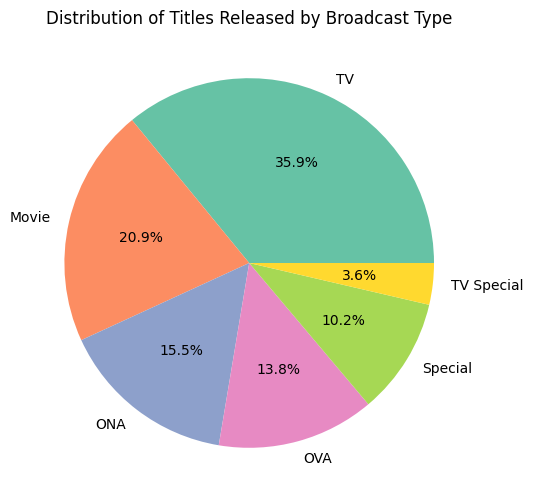

In [29]:
type_perc = df['Type'].value_counts() / len(df) * 100
colors = sns.color_palette('Set2')

plt.figure(figsize=(8, 6))
plt.pie(data=type_perc, x=type_perc.values, labels=type_perc.index, autopct='%.1f%%', colors=colors)

plt.title('Distribution of Titles Released by Broadcast Type')
plt.show()

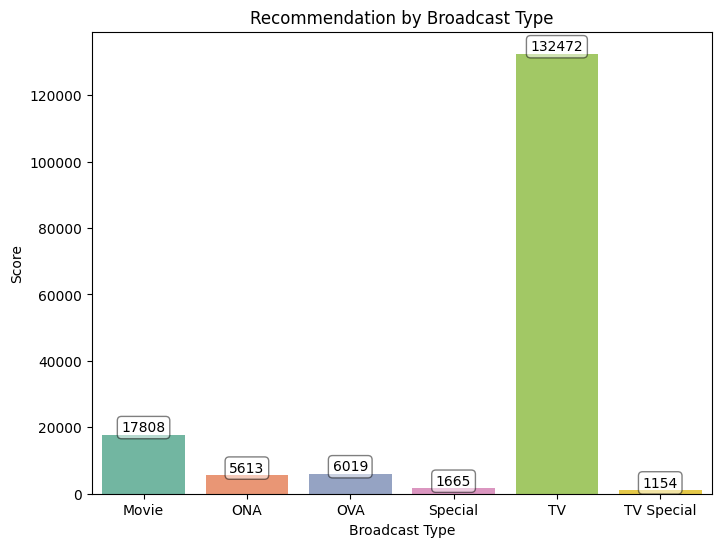

In [30]:
type_df = pd.DataFrame(df.groupby('Type')['Recommended'].sum())

plt.figure(figsize=(8, 6))
ax=sns.barplot(data=type_df, x=type_df.index, y=type_df['Recommended'], palette='Set2')
for item in ax.containers:
    ax.bar_label(item, label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

plt.title('Recommendation by Broadcast Type')
plt.xlabel('Broadcast Type')
plt.ylabel('Score')
plt.show()

## Recommendation by Age Rating

In [31]:
df['Rating'].value_counts()

Rating
PG-13 - Teens 13 or older         7196
G - All Ages                      3598
PG - Children                     1796
R - 17+ (violence & profanity)    1337
R+ - Mild Nudity                  1012
Unknown                            139
Rx - Hentai                          1
Name: count, dtype: int64

In [32]:
# Let's change the single 'Rx - Hentai' value into 'Unknown'
df.loc[df['Rating'] == 'Rx - Hentai', 'Rating'] = 'Unknown'

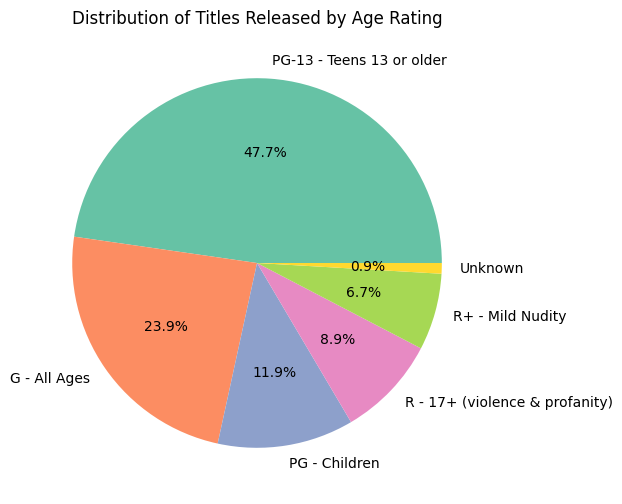

In [33]:
rating_perc = df['Rating'].value_counts() / len(df) * 100
colors = sns.color_palette('Set2')

plt.figure(figsize=(8, 6))
plt.pie(data=rating_perc, x=rating_perc.values, labels=rating_perc.index, autopct='%.1f%%', colors=colors)

plt.title('Distribution of Titles Released by Age Rating')
plt.show()

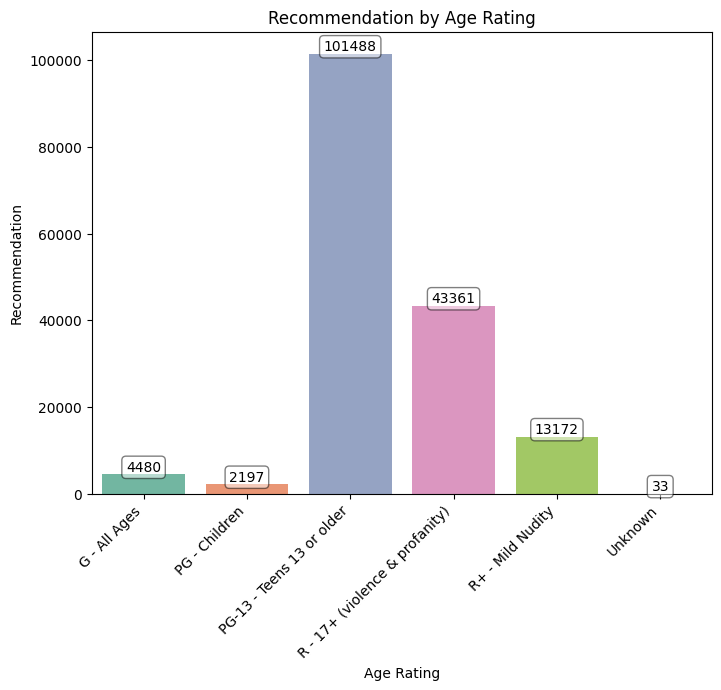

In [34]:
age_rating_df = pd.DataFrame(df.groupby('Rating')['Recommended'].sum())

plt.figure(figsize=(8, 6))
ax=sns.barplot(data=age_rating_df, x=age_rating_df.index, y=age_rating_df['Recommended'], palette='Set2')
for item in ax.containers:
    ax.bar_label(item, label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))

plt.title('Recommendation by Age Rating')
plt.xlabel('Age Rating')
plt.ylabel('Recommendation')
plt.xticks(rotation=45, ha='right')
plt.show()

## Top 10 Most Recommended Studios

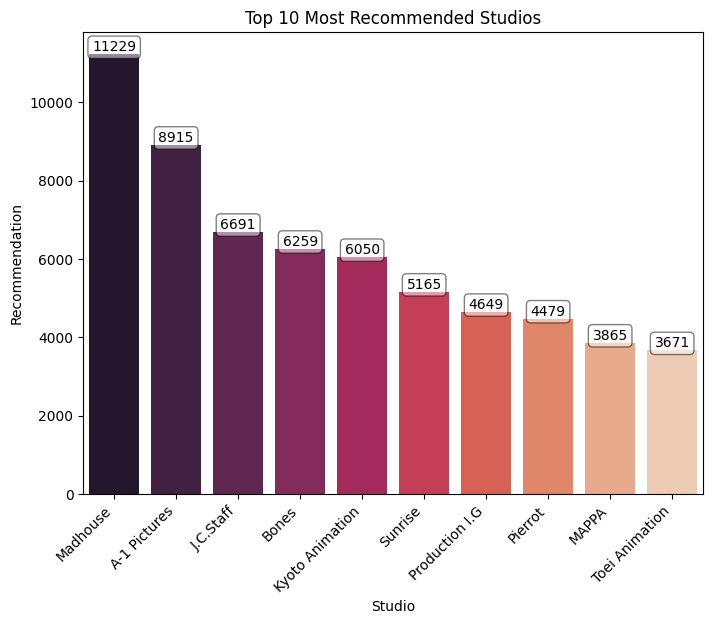

In [35]:
studio_df = pd.DataFrame(df.groupby('Studios')['Recommended'].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(8 ,6))
ax=sns.barplot(data=studio_df, x=studio_df.index, y=studio_df['Recommended'], palette='rocket')
for item in ax.containers:
    ax.bar_label(item, label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.title('Top 10 Most Recommended Studios')
plt.xlabel('Studio')
plt.ylabel('Recommendation')
plt.xticks(rotation=45, ha='right')
plt.show()

## Top 10 Most Recommended Genre(s)

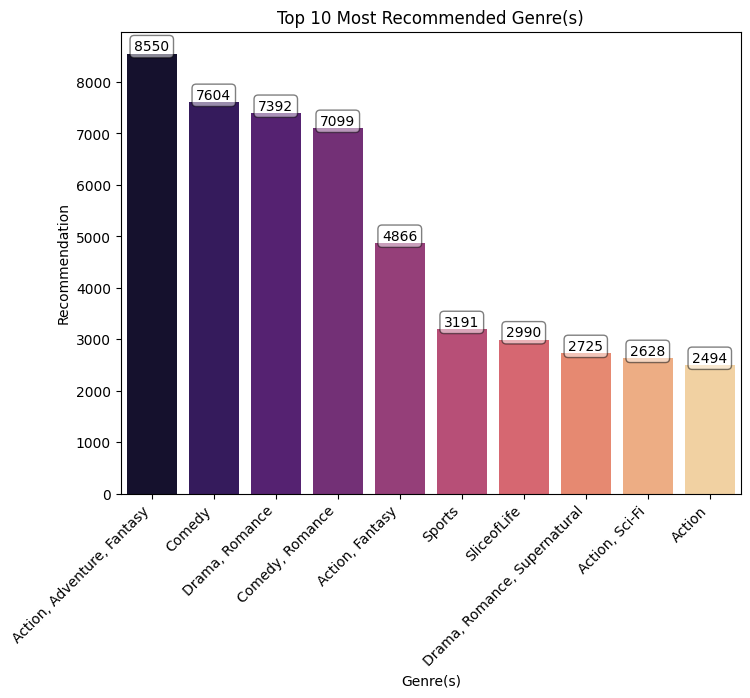

In [36]:
genre_df = pd.DataFrame(df.groupby('Genres')['Recommended'].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(8, 6))
ax=sns.barplot(data=genre_df, x=genre_df.index, y=genre_df['Recommended'], palette='magma')
for item in ax.containers:
    ax.bar_label(item, label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.title('Top 10 Most Recommended Genre(s)')
plt.xlabel('Genre(s)')
plt.ylabel('Recommendation')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
# Checking if an anime that meets all the requirements exists
df.loc[
    (df['Season'] == seasons_df.idxmax()[0]) &      # Released or premiered in Fall,
    (df['Source'] == source_df.idxmax()[0]) &       # adapted from a manga,
    (df['Studios'] == studio_df.idxmax()[0]) &      # animated by Madhouse,
    (df['Type'] == type_df.idxmax()[0]) &           # aired on TV as a series,
    (df['Genres'] == genre_df.idxmax()[0]) &        # has action, adventure and fantasy as it's genres, 
    (df['Rating'] == age_rating_df.idxmax()[0])     # rated as PG-13.
].T


,7
Japanese,HUNTER×HUNTER（ハンター×ハンター）
Type,TV
Episodes,148
Status,Finished Airing
Aired,"Oct 2, 2011 to Sep 24, 2014"
Premiered,Fall 2011
Producers,"VAP, Nippon Television Network, Sh..."
Licensors,VIZ Media
Studios,Madhouse
Source,Manga
